<a href="https://colab.research.google.com/github/martinfinis/HelloCodeSchoolProject/blob/master/Quest_NN_1_Martin_V4_epochs_1000.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparation
Import TensorFlow library and the [Boston housing dataset](https://keras.io/api/datasets/boston_housing/) by running the cells below. In this quest, we will be predicting house prices based on various features. For this purose, we will build a very basic neural network. In the later quests, you will build upon this framework and extend it with new methods, better suited for achieving better results with the current task as well as running more complex ones.

In [ ]:
import tensorflow as tf
boston_housing = tf.keras.datasets.boston_housing

In [ ]:
#keep the results
import pandas as pd
df = pd.DataFrame(columns=["description","epoch","loss","acc","min_loss","min_val_loss","train_loss_list","val_loss_list"])

In [ ]:
import matplotlib.pyplot as plt

def add_row_data_dispaly_result(df,description,epoch,X_test,y_test,model,history):
  loss, acc = model.evaluate(X_test, y_test)
  
  train_loss_list = history.history['loss']
  val_loss_list = history.history['val_loss']
  min_loss = min(train_loss_list)
  min_val_loss = min(val_loss_list)
  
  df.loc[len(df)] = [description,epoch,loss,acc,min_loss,min_val_loss,train_loss_list,val_loss_list]
  
  print_plot(description,'loss','val_loss',train_loss_list,val_loss_list)
  display(df.drop(columns=['train_loss_list','val_loss_list']).tail(1))

  return df

def print_plot(description,legend_train,legend_val,train_list,val_list):
  plt.figure(figsize=(10,5))

  x = np.arange(len(train_list))

  plt.subplot(1, 2, 1)
  plt.plot(x, np.log10(train_list))
  plt.plot(x, np.log10(val_list))
  plt.legend([legend_train, legend_val])
  plt.title(" (log10) ")

  plt.subplot(1, 2, 2)
  x_from = 900
  plt.plot(x[x_from:], train_list[x_from:])
  plt.plot(x[x_from:], val_list[x_from:])
  plt.legend([legend_train, legend_val])
  plt.title("x_start from "+str(x_from))
  
  plt.suptitle(description)
  plt.show()

# Tasks

From the dataset, extract training and testing features and labels.

In [ ]:
data = boston_housing.load_data(test_split=0.2)

In [ ]:
type(data)

tuple

In [ ]:
data[0][0].shape

(404, 13)

In [ ]:
import numpy as np

X_train = data[0][0]
y_train = data[0][1]
X_test = data[1][0]
y_test = data[1][1]

y_train = np.reshape(y_train, (y_train.shape[0],1))
y_test = np.reshape(y_test, (y_test.shape[0],1))

print('Shape of training data:    ', X_train.shape)
print('Shape of training labels:  ', y_train.shape)
print('Shape of test data:        ', X_test.shape)
print('Shape of test labels:      ', y_test.shape)

Shape of training data:     (404, 13)
Shape of training labels:   (404, 1)
Shape of test data:         (102, 13)
Shape of test labels:       (102, 1)


In [ ]:
X_train.shape

(404, 13)

Build a very simple sequential model with three [dense](https://medium.com/datathings/dense-layers-explained-in-a-simple-way-62fe1db0ed75) layers - one input layer for the features, one hidden layer and one output layer for the price prediction. Equip the hidden layers with 64 neurons. How many nodes does the output layer need? An what activation function? Make the input and the hidden layer use [ReLu](https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/) as your activation function.

In [ ]:
X_train.shape[1]

13

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model_1 = Sequential()
model_1.add(Dense(64, activation = 'relu', input_shape = (X_train.shape[1],)))
#model_1.add(Dense(64, activation = 'relu'))
model_1.add(Dense(1))

Print the model summary to get an overview of it in the cell below.

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                896       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


Now, compile your model. For the sake of simplicity, use Mean Squared Error both as loss function and as metrics. For optimization, use [Adam](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/#:~:text=Adam%20is%20an%20optimization%20algorithm,iterative%20based%20in%20training%20data.&text=The%20algorithm%20is%20called%20Adam.).

In [ ]:
model_1.compile(optimizer='adam', loss = 'mse', metrics='mse')

Fit the model on the train data. 1000 epochs should be more than enough. 

In [ ]:
history_1 = model_1.fit(X_train, y_train, epochs=1000, verbose = 1, validation_split=0.2)

Epoch 1/1000
11/11 [==============================] - 1s 43ms/step - loss: 187.1627 - mse: 187.1627 - val_loss: 91.9033 - val_mse: 91.9033
Epoch 2/1000
11/11 [==============================] - 0s 5ms/step - loss: 75.9383 - mse: 75.9383 - val_loss: 79.4365 - val_mse: 79.4365
Epoch 3/1000
11/11 [==============================] - 0s 5ms/step - loss: 65.1468 - mse: 65.1468 - val_loss: 65.5266 - val_mse: 65.5266
Epoch 4/1000
11/11 [==============================] - 0s 4ms/step - loss: 62.6595 - mse: 62.6595 - val_loss: 60.6139 - val_mse: 60.6139
Epoch 5/1000
11/11 [==============================] - 0s 5ms/step - loss: 51.0757 - mse: 51.0757 - val_loss: 70.4260 - val_mse: 70.4260
Epoch 6/1000
11/11 [==============================] - 0s 5ms/step - loss: 68.5270 - mse: 68.5270 - val_loss: 58.8694 - val_mse: 58.8694
Epoch 7/1000
11/11 [==============================] - 0s 5ms/step - loss: 52.6031 - mse: 52.6031 - val_loss: 59.0451 - val_mse: 59.0451
Epoch 8/1000
11/11 [=========================

Finally, evaluate your model on the test data and get the score.

In [ ]:
loss_1, acc_1 = model_1.evaluate(X_test, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 29.0382 - mse: 29.0382


#Further suggestions: 

Plot the loss on the training AND validation set for each epoch

What does this tell you about your model? 

Try out different hyperparameters, i.e. reduce the number of neurons in your hidden layers - or increase them, add more hidden layers, add some regularization, i.e. L2-regularization or dropout

## Plot the loss on the training AND validation set for each epoch

4/4 [==============================] - 0s 2ms/step - loss: 29.0382 - mse: 29.0382


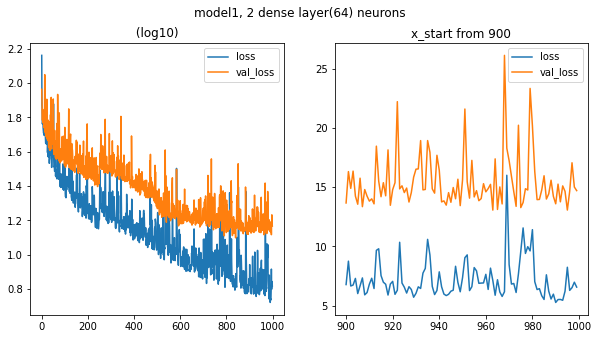

,description,epoch,loss,acc,min_loss,min_val_loss
0,"model1, 2 dense layer(64) neurons",1000,29.038239,29.038239,5.2711,12.539773


In [ ]:
df = add_row_data_dispaly_result(df,'model1, 1 dense layer(64) neurons',1000,X_test, y_test,model_1,history_1)

## reduce the number of neurons in your hidden layers to 32

In [ ]:
model_2 = Sequential()
model_2.add(Dense(32, activation = 'relu', input_shape = (X_train.shape[1],)))
#model_2.add(Dense(32, activation = 'relu'))
model_2.add(Dense(1))
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                448       
_________________________________________________________________
dense_4 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 1,537
Trainable params: 1,537
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_2.compile(optimizer='adam', loss = 'mse', metrics='mse')
history_2 = model_2.fit(X_train, y_train, epochs=1000, verbose = 1, validation_split=0.2)

Epoch 1/1000
11/11 [==============================] - 0s 14ms/step - loss: 274.0164 - mse: 274.0164 - val_loss: 87.3871 - val_mse: 87.3871
Epoch 2/1000
11/11 [==============================] - 0s 5ms/step - loss: 79.4615 - mse: 79.4615 - val_loss: 85.8535 - val_mse: 85.8535
Epoch 3/1000
11/11 [==============================] - 0s 5ms/step - loss: 75.9680 - mse: 75.9680 - val_loss: 73.5751 - val_mse: 73.5751
Epoch 4/1000
11/11 [==============================] - 0s 5ms/step - loss: 93.1126 - mse: 93.1126 - val_loss: 87.9822 - val_mse: 87.9822
Epoch 5/1000
11/11 [==============================] - 0s 5ms/step - loss: 68.1055 - mse: 68.1055 - val_loss: 83.5410 - val_mse: 83.5410
Epoch 6/1000
11/11 [==============================] - 0s 5ms/step - loss: 81.5047 - mse: 81.5047 - val_loss: 68.6953 - val_mse: 68.6953
Epoch 7/1000
11/11 [==============================] - 0s 4ms/step - loss: 61.3916 - mse: 61.3916 - val_loss: 68.8434 - val_mse: 68.8434
Epoch 8/1000
11/11 [=========================

4/4 [==============================] - 0s 2ms/step - loss: 25.4199 - mse: 25.4199


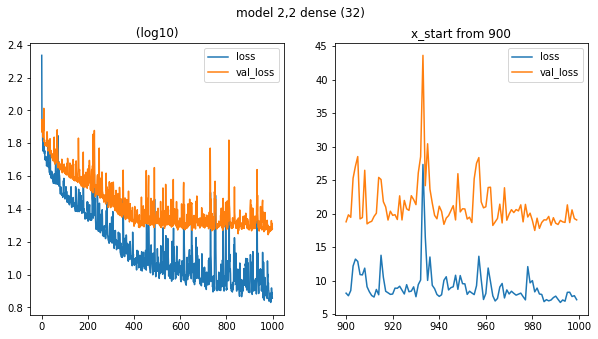

,description,epoch,loss,acc,min_loss,min_val_loss
1,"model 2,2 dense (32)",1000,25.419912,25.419912,6.757528,17.495838


In [ ]:
df = add_row_data_dispaly_result(df,'model 2,2 dense (32)',1000,X_test, y_test,model_2,history_2)

## increase the number of neurons in your hidden layers to 128

In [ ]:
model_3 = Sequential()
model_3.add(Dense(128, activation = 'relu', input_shape = (X_train.shape[1],)))
#model_3.add(Dense(128, activation = 'relu'))
model_3.add(Dense(1))
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 128)               1792      
_________________________________________________________________
dense_7 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 129       
Total params: 18,433
Trainable params: 18,433
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_3.compile(optimizer='adam', loss = 'mse', metrics='mse')
history_3 = model_3.fit(X_train, y_train, epochs=1000, verbose = 1, validation_split=0.2)

Epoch 1/1000
11/11 [==============================] - 0s 14ms/step - loss: 3415.6475 - mse: 3415.6475 - val_loss: 150.5759 - val_mse: 150.5759
Epoch 2/1000
11/11 [==============================] - 0s 5ms/step - loss: 295.2735 - mse: 295.2735 - val_loss: 131.8780 - val_mse: 131.8780
Epoch 3/1000
11/11 [==============================] - 0s 5ms/step - loss: 139.0060 - mse: 139.0060 - val_loss: 64.3385 - val_mse: 64.3385
Epoch 4/1000
11/11 [==============================] - 0s 4ms/step - loss: 84.3105 - mse: 84.3105 - val_loss: 74.6740 - val_mse: 74.6740
Epoch 5/1000
11/11 [==============================] - 0s 4ms/step - loss: 56.2306 - mse: 56.2306 - val_loss: 65.9883 - val_mse: 65.9883
Epoch 6/1000
11/11 [==============================] - 0s 5ms/step - loss: 51.7742 - mse: 51.7742 - val_loss: 61.5953 - val_mse: 61.5953
Epoch 7/1000
11/11 [==============================] - 0s 5ms/step - loss: 62.3999 - mse: 62.3999 - val_loss: 76.4922 - val_mse: 76.4922
Epoch 8/1000
11/11 [===============

4/4 [==============================] - 0s 2ms/step - loss: 28.4300 - mse: 28.4300


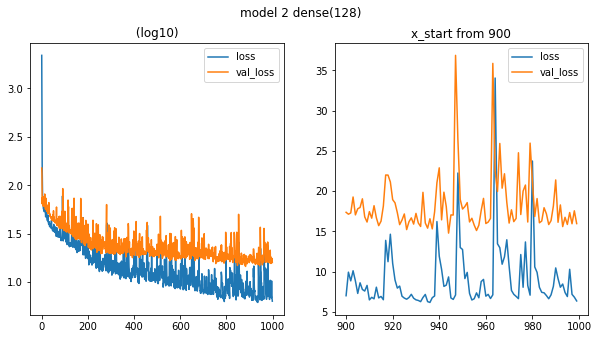

,description,epoch,loss,acc,min_loss,min_val_loss
2,model 2 dense(128),1000,28.429976,28.429976,6.170996,14.528421


In [ ]:
df = add_row_data_dispaly_result(df,'model_3 1 dense(128)',1000,X_test, y_test,model_3,history_3)

##2 hidden layers

In [ ]:
model_4 = Sequential()
model_4.add(Dense(64, activation = 'relu', input_shape = (X_train.shape[1],)))
model_4.add(Dense(64, activation = 'relu'))
model_4.add(Dense(1))
model_4.summary()

In [ ]:
model_4.compile(optimizer='adam', loss = 'mse', metrics='mse')
history_4 = model_4.fit(X_train, y_train, epochs=1000, verbose = 1, validation_split=0.2)

Epoch 1/1000
11/11 [==============================] - 1s 16ms/step - loss: 212.3607 - mse: 212.3607 - val_loss: 129.3948 - val_mse: 129.3948
Epoch 2/1000
11/11 [==============================] - 0s 5ms/step - loss: 108.6586 - mse: 108.6586 - val_loss: 79.3192 - val_mse: 79.3192
Epoch 3/1000
11/11 [==============================] - 0s 5ms/step - loss: 71.8359 - mse: 71.8359 - val_loss: 79.6449 - val_mse: 79.6449
Epoch 4/1000
11/11 [==============================] - 0s 5ms/step - loss: 97.1699 - mse: 97.1699 - val_loss: 91.3409 - val_mse: 91.3409
Epoch 5/1000
11/11 [==============================] - 0s 5ms/step - loss: 105.0579 - mse: 105.0579 - val_loss: 92.2980 - val_mse: 92.2980
Epoch 6/1000
11/11 [==============================] - 0s 5ms/step - loss: 95.9506 - mse: 95.9506 - val_loss: 75.1565 - val_mse: 75.1565
Epoch 7/1000
11/11 [==============================] - 0s 5ms/step - loss: 60.1838 - mse: 60.1838 - val_loss: 77.5932 - val_mse: 77.5932
Epoch 8/1000
11/11 [===================

4/4 [==============================] - 0s 3ms/step - loss: 33.8910 - mse: 33.8910


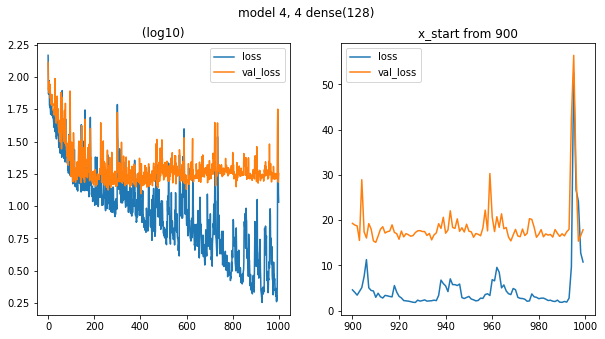

,description,epoch,loss,acc,min_loss,min_val_loss
3,"model 4, 4 dense(128)",1000,33.890957,33.890957,1.798718,12.48424


In [ ]:
df = add_row_data_dispaly_result(df,'model 4, 4 dense(64)',1000,X_test, y_test,model_4,history_4)

##4 hidden layers

In [ ]:
model_41 = Sequential()
model_41.add(Dense(64, activation = 'relu', input_shape = (X_train.shape[1],)))
model_41.add(Dense(64, activation = 'relu'))
model_41.add(Dense(64, activation = 'relu'))
model_41.add(Dense(64, activation = 'relu'))
model_41.add(Dense(1))
model_41.summary()

In [ ]:
model_41.compile(optimizer='adam', loss = 'mse', metrics='mse')
history_41 = model_41.fit(X_train, y_train, epochs=1000, verbose = 1, validation_split=0.2)

Epoch 1/1000
11/11 [==============================] - 1s 16ms/step - loss: 212.3607 - mse: 212.3607 - val_loss: 129.3948 - val_mse: 129.3948
Epoch 2/1000
11/11 [==============================] - 0s 5ms/step - loss: 108.6586 - mse: 108.6586 - val_loss: 79.3192 - val_mse: 79.3192
Epoch 3/1000
11/11 [==============================] - 0s 5ms/step - loss: 71.8359 - mse: 71.8359 - val_loss: 79.6449 - val_mse: 79.6449
Epoch 4/1000
11/11 [==============================] - 0s 5ms/step - loss: 97.1699 - mse: 97.1699 - val_loss: 91.3409 - val_mse: 91.3409
Epoch 5/1000
11/11 [==============================] - 0s 5ms/step - loss: 105.0579 - mse: 105.0579 - val_loss: 92.2980 - val_mse: 92.2980
Epoch 6/1000
11/11 [==============================] - 0s 5ms/step - loss: 95.9506 - mse: 95.9506 - val_loss: 75.1565 - val_mse: 75.1565
Epoch 7/1000
11/11 [==============================] - 0s 5ms/step - loss: 60.1838 - mse: 60.1838 - val_loss: 77.5932 - val_mse: 77.5932
Epoch 8/1000
11/11 [===================

4/4 [==============================] - 0s 3ms/step - loss: 33.8910 - mse: 33.8910


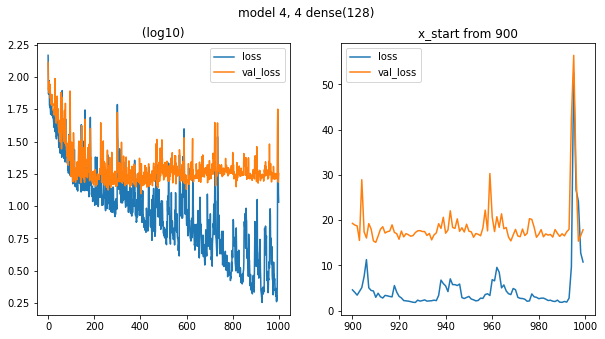

,description,epoch,loss,acc,min_loss,min_val_loss
3,"model 4, 4 dense(128)",1000,33.890957,33.890957,1.798718,12.48424


In [ ]:
df = add_row_data_dispaly_result(df,'model 4_1, 4 dense(64)',1000,X_test, y_test,model_41,history_41)

##add some regularization

 #### L2-regularization

##### 2 hidden layer dense(64)

In [ ]:
from keras import regularizers

model_5 = Sequential()
model_5.add(Dense(64, activation = 'relu',kernel_regularizer=regularizers.l2(0.001), input_shape = (X_train.shape[1],)))
model_5.add(Dense(64, activation = 'relu',kernel_regularizer=regularizers.l2(0.001)))
model_5.add(Dense(1))
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 64)                896       
_________________________________________________________________
dense_15 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_5.compile(optimizer='adam', loss = 'mse', metrics='mse')
history_5 = model_5.fit(X_train, y_train, epochs=1000, verbose = 1, validation_split=0.2)

Epoch 1/1000
11/11 [==============================] - 1s 29ms/step - loss: 510.7414 - mse: 510.6593 - val_loss: 208.5802 - val_mse: 208.5019
Epoch 2/1000
11/11 [==============================] - 0s 6ms/step - loss: 181.5606 - mse: 181.4833 - val_loss: 151.4724 - val_mse: 151.3982
Epoch 3/1000
11/11 [==============================] - 0s 5ms/step - loss: 85.3582 - mse: 85.2850 - val_loss: 76.9621 - val_mse: 76.8916
Epoch 4/1000
11/11 [==============================] - 0s 5ms/step - loss: 61.5078 - mse: 61.4380 - val_loss: 92.3288 - val_mse: 92.2614
Epoch 5/1000
11/11 [==============================] - 0s 5ms/step - loss: 87.3586 - mse: 87.2919 - val_loss: 98.6473 - val_mse: 98.5826
Epoch 6/1000
11/11 [==============================] - 0s 5ms/step - loss: 70.4564 - mse: 70.3922 - val_loss: 87.8220 - val_mse: 87.7596
Epoch 7/1000
11/11 [==============================] - 0s 5ms/step - loss: 64.8254 - mse: 64.7635 - val_loss: 69.0302 - val_mse: 68.9697
Epoch 8/1000
11/11 [===================

4/4 [==============================] - 0s 2ms/step - loss: 25.6975 - mse: 25.5545


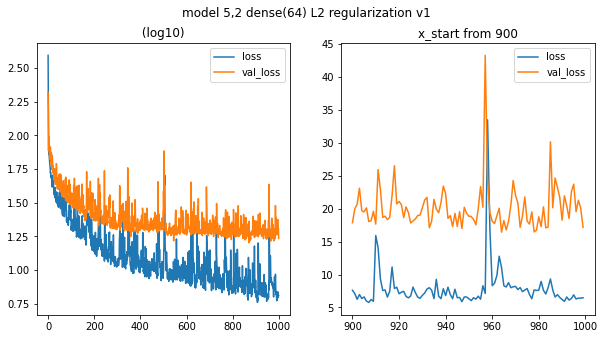

,description,epoch,loss,acc,min_loss,min_val_loss
4,"model 5,2 dense(64) L2 regularization v1",1000,25.697456,25.554499,5.757426,15.944118


In [ ]:
df = add_row_data_dispaly_result(df,'model 5,2 dense(64) L2 regularization ',1000,X_test, y_test,model_5,history_5)

##### 4 hidden layer dense(64)

In [ ]:
model_6 = Sequential()
model_6.add(Dense(64, activation = 'relu',kernel_regularizer=regularizers.l2(0.001), input_shape = (X_train.shape[1],)))
model_6.add(Dense(64, activation = 'relu',kernel_regularizer=regularizers.l2(0.001)))
model_6.add(Dense(64, activation = 'relu',kernel_regularizer=regularizers.l2(0.001)))
model_6.add(Dense(64, activation = 'relu',kernel_regularizer=regularizers.l2(0.001)))
model_6.add(Dense(1))
model_6.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 128)               1792      
_________________________________________________________________
dense_18 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_19 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_20 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 129       
Total params: 51,457
Trainable params: 51,457
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_6.compile(optimizer='adam', loss = 'mse', metrics='mse')
history_6 = model_6.fit(X_train, y_train, epochs=1000, verbose = 1, validation_split=0.2)

Epoch 1/1000
11/11 [==============================] - 1s 17ms/step - loss: 634.0704 - mse: 633.6731 - val_loss: 127.6242 - val_mse: 127.2598
Epoch 2/1000
11/11 [==============================] - 0s 6ms/step - loss: 93.2011 - mse: 92.8456 - val_loss: 111.6867 - val_mse: 111.3573
Epoch 3/1000
11/11 [==============================] - 0s 6ms/step - loss: 73.4974 - mse: 73.1751 - val_loss: 68.1240 - val_mse: 67.8223
Epoch 4/1000
11/11 [==============================] - 0s 5ms/step - loss: 58.6552 - mse: 58.3591 - val_loss: 68.6070 - val_mse: 68.3272
Epoch 5/1000
11/11 [==============================] - 0s 5ms/step - loss: 69.1683 - mse: 68.8929 - val_loss: 76.8221 - val_mse: 76.5597
Epoch 6/1000
11/11 [==============================] - 0s 5ms/step - loss: 70.1653 - mse: 69.9064 - val_loss: 80.6075 - val_mse: 80.3587
Epoch 7/1000
11/11 [==============================] - 0s 5ms/step - loss: 57.1660 - mse: 56.9199 - val_loss: 71.7377 - val_mse: 71.4995
Epoch 8/1000
11/11 [=====================

4/4 [==============================] - 0s 2ms/step - loss: 29.9287 - mse: 29.5875


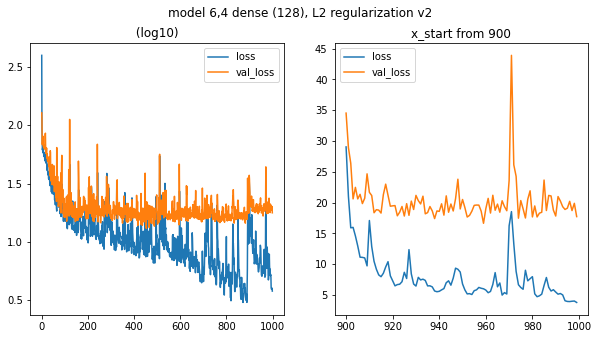

,description,epoch,loss,acc,min_loss,min_val_loss
5,"model 6,4 dense (128), L2 regularization v2",1000,29.928661,29.587452,3.01816,13.066798


In [ ]:
df = add_row_data_dispaly_result(df,'model 6,4 dense (64), L2 regularization',1000,X_test, y_test,model_6,history_6)

###dropout

##### 2 hidden layer, dense (64)

In [ ]:
from tensorflow.keras.layers import Dense, Dropout

model_7 = Sequential()
model_7.add(Dense(64, activation = 'relu', input_shape = (X_train.shape[1],)))
model_7.add(Dropout(0.5))
model_7.add(Dense(64, activation = 'relu'))
model_7.add(Dense(1))
model_7.summary()

In [ ]:
model_7.compile(optimizer='adam', loss = 'mse', metrics='mse')
history_7 = model_7.fit(X_train, y_train, epochs=1000, verbose = 1, validation_split=0.2)

Epoch 1/1000
11/11 [==============================] - 1s 15ms/step - loss: 5804.2316 - mse: 5804.2316 - val_loss: 685.7823 - val_mse: 685.7823
Epoch 2/1000
11/11 [==============================] - 0s 6ms/step - loss: 3135.2663 - mse: 3135.2663 - val_loss: 663.6603 - val_mse: 663.6603
Epoch 3/1000
11/11 [==============================] - 0s 5ms/step - loss: 1559.7269 - mse: 1559.7269 - val_loss: 460.3766 - val_mse: 460.3766
Epoch 4/1000
11/11 [==============================] - 0s 5ms/step - loss: 970.5064 - mse: 970.5064 - val_loss: 490.9066 - val_mse: 490.9066
Epoch 5/1000
11/11 [==============================] - 0s 5ms/step - loss: 1012.3995 - mse: 1012.3995 - val_loss: 531.1553 - val_mse: 531.1553
Epoch 6/1000
11/11 [==============================] - 0s 5ms/step - loss: 828.5096 - mse: 828.5096 - val_loss: 535.2680 - val_mse: 535.2680
Epoch 7/1000
11/11 [==============================] - 0s 5ms/step - loss: 636.5724 - mse: 636.5724 - val_loss: 496.3986 - val_mse: 496.3986
Epoch 8/100

4/4 [==============================] - 0s 2ms/step - loss: 58.3581 - mse: 58.3581


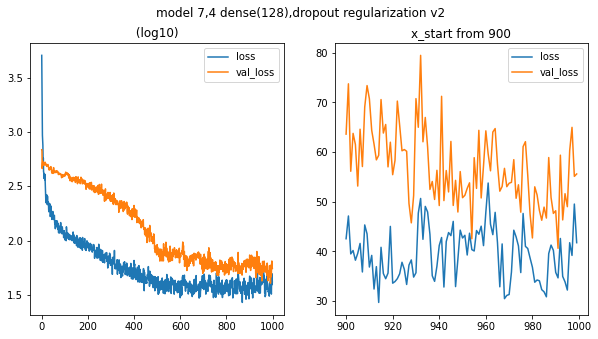

,description,epoch,loss,acc,min_loss,min_val_loss
6,"model 7,4 dense(128),dropout regularization v2",1000,58.358078,58.358078,27.010614,40.634144


In [ ]:
df = add_row_data_dispaly_result(df,'model 7,4 dense(64),dropout regularization',1000,X_test, y_test,model_7,history_7)

##### 4 hidden layer, dense (64)

In [ ]:
from tensorflow.keras.layers import Dense, Dropout

model_8 = Sequential()
model_8.add(Dense(64, activation = 'relu', input_shape = (X_train.shape[1],)))
model_8.add(Dropout(0.5))
model_8.add(Dense(64, activation = 'relu'))
model_8.add(Dropout(0.5))
model_8.add(Dense(64, activation = 'relu'))
model_8.add(Dropout(0.5))
model_8.add(Dense(64, activation = 'relu'))
model_8.add(Dropout(0.5))
model_8.add(Dense(1))
model_8.summary()

In [ ]:
model_8.compile(optimizer='adam', loss = 'mse', metrics='mse')
history_8 = model_8.fit(X_train, y_train, epochs=1000, verbose = 1, validation_split=0.2)

Epoch 1/1000
11/11 [==============================] - 1s 15ms/step - loss: 5804.2316 - mse: 5804.2316 - val_loss: 685.7823 - val_mse: 685.7823
Epoch 2/1000
11/11 [==============================] - 0s 6ms/step - loss: 3135.2663 - mse: 3135.2663 - val_loss: 663.6603 - val_mse: 663.6603
Epoch 3/1000
11/11 [==============================] - 0s 5ms/step - loss: 1559.7269 - mse: 1559.7269 - val_loss: 460.3766 - val_mse: 460.3766
Epoch 4/1000
11/11 [==============================] - 0s 5ms/step - loss: 970.5064 - mse: 970.5064 - val_loss: 490.9066 - val_mse: 490.9066
Epoch 5/1000
11/11 [==============================] - 0s 5ms/step - loss: 1012.3995 - mse: 1012.3995 - val_loss: 531.1553 - val_mse: 531.1553
Epoch 6/1000
11/11 [==============================] - 0s 5ms/step - loss: 828.5096 - mse: 828.5096 - val_loss: 535.2680 - val_mse: 535.2680
Epoch 7/1000
11/11 [==============================] - 0s 5ms/step - loss: 636.5724 - mse: 636.5724 - val_loss: 496.3986 - val_mse: 496.3986
Epoch 8/100

4/4 [==============================] - 0s 2ms/step - loss: 58.3581 - mse: 58.3581


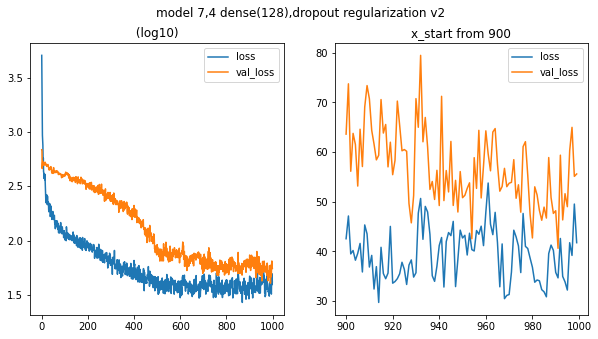

,description,epoch,loss,acc,min_loss,min_val_loss
6,"model 7,4 dense(128),dropout regularization v2",1000,58.358078,58.358078,27.010614,40.634144


In [ ]:
df = add_row_data_dispaly_result(df,'model 8,4 dense(64),dropout regularization',1000,X_test, y_test,model_8,history_8)

# Result

In [ ]:
df.drop(columns=['train_loss_list','val_loss_list'])

,description,epoch,loss,acc,min_loss,min_val_loss
0,"model1, 2 dense layer(64) neurons",1000,29.038239,29.038239,5.271100,12.539773
1,"model 2,2 dense (32)",1000,25.419912,25.419912,6.757528,17.495838
2,model 2 dense(128),1000,28.429976,28.429976,6.170996,14.528421
3,"model 4, 4 dense(128)",1000,33.890957,33.890957,1.798718,12.484240
4,"model 5,2 dense(64) L2 regularization v1",1000,25.697456,25.554499,5.757426,15.944118
5,"model 6,4 dense (128), L2 regularization v2",1000,29.928661,29.587452,3.018160,13.066798
6,"model 7,4 dense(128),dropout regularization v2",1000,58.358078,58.358078,27.010614,40.634144


# Conclusion

-the model with 2 dense layers, 64 neuros and training with L2 regularization gets the best result-



forget it after a new run I got a differnt result see below

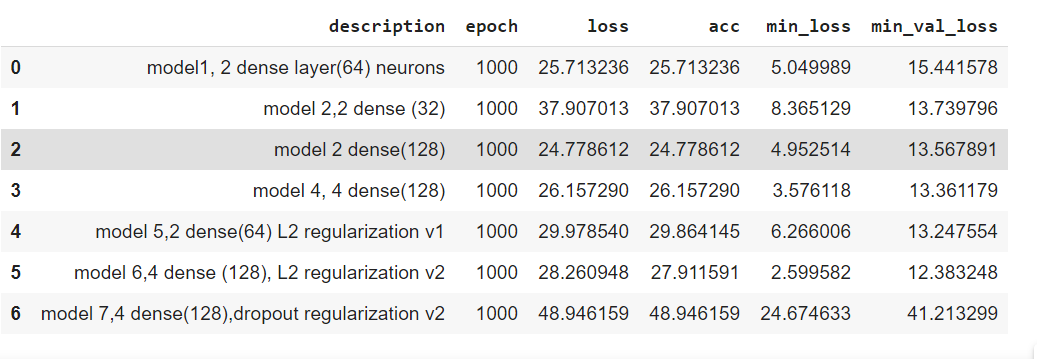

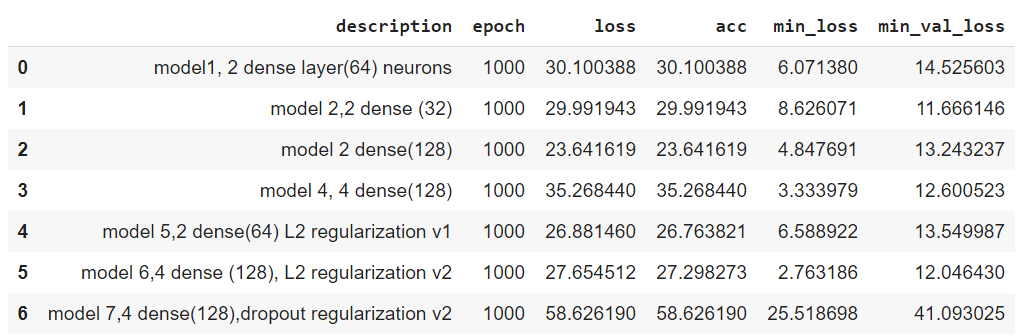

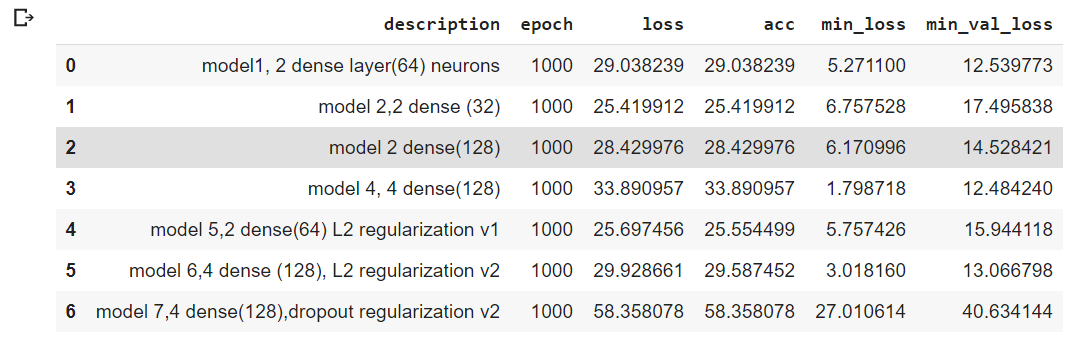

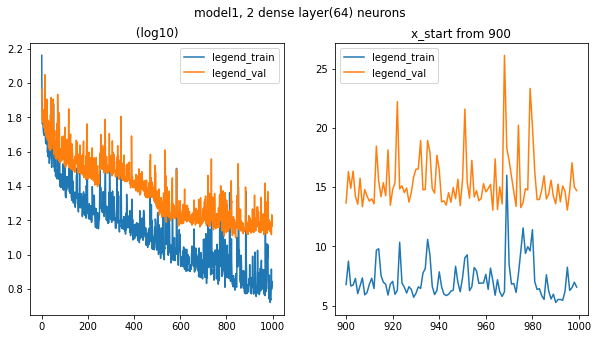

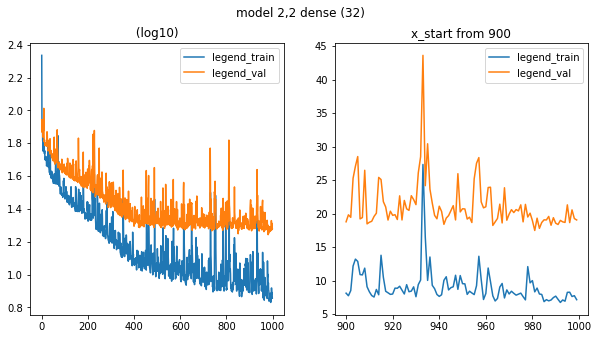

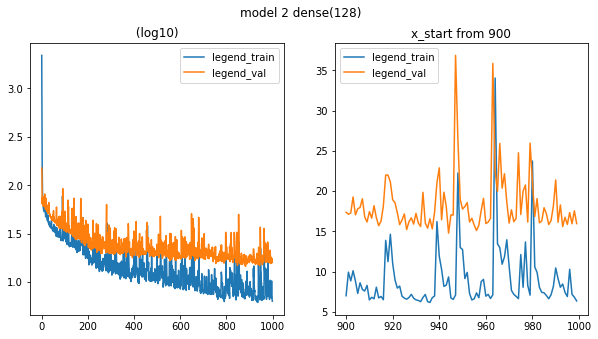

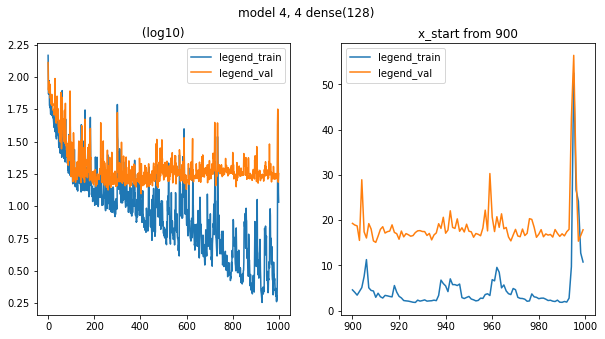

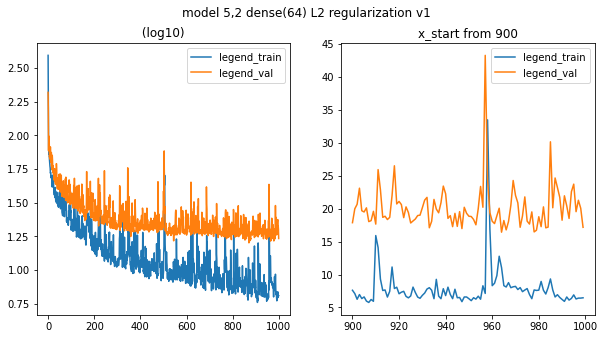

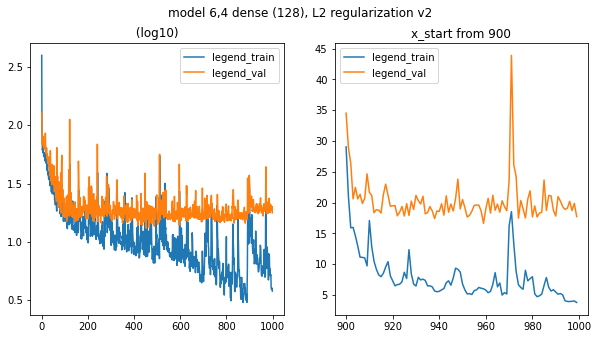

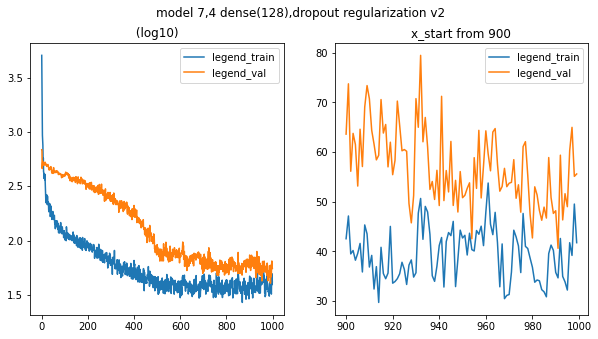

0    None
1    None
2    None
3    None
4    None
5    None
6    None
dtype: object

In [ ]:
df.apply(lambda x: print_plot(x.description,'legend_train','legend_val',x.train_loss_list, x.val_loss_list), axis=1)

#The End